# importing Libraries

In [87]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [88]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score as acc
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [89]:
#Understanding the data

In [90]:
train_file = pd.read_csv('train.csv')
test_file = pd.read_csv('test.csv')
sub_file = pd.read_csv('gender_submission.csv')

In [91]:
train_file.shape

(891, 12)

In [92]:
train_file.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [93]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [94]:
train_file.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [95]:
train_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
train_file.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Visualizing the Data

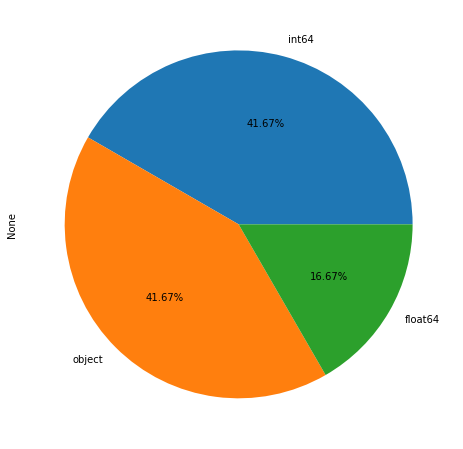

In [97]:
plt.figure(figsize=(8,8))
train_file.dtypes.value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

<AxesSubplot:xlabel='count', ylabel='Embarked'>

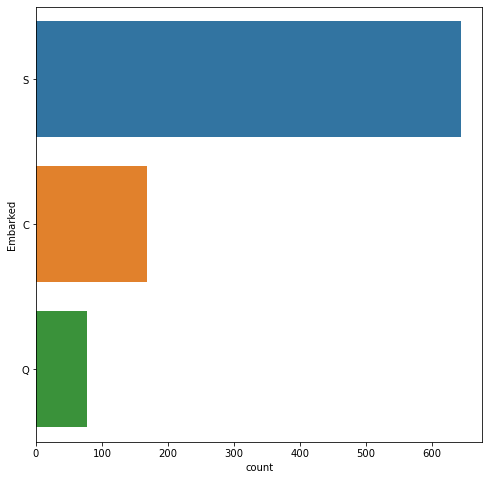

In [98]:
plt.figure(figsize=(8,8))
sns.countplot(data=train_file, y="Embarked", order=train_file['Embarked'].value_counts().index[0:115])

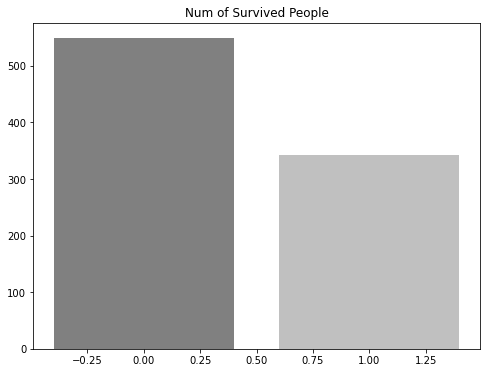

In [99]:
plt.figure(figsize=(8,6))
plt.bar(list(train_file['Survived'].value_counts().keys()), list(train_file['Survived'].value_counts()), color=('gray', 'silver'))
plt.title("Num of Survived People")
plt.show()

In [100]:
train_file['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [101]:
sum(train_file['Survived'].isnull())

0

<AxesSubplot:xlabel='count', ylabel='Ticket'>

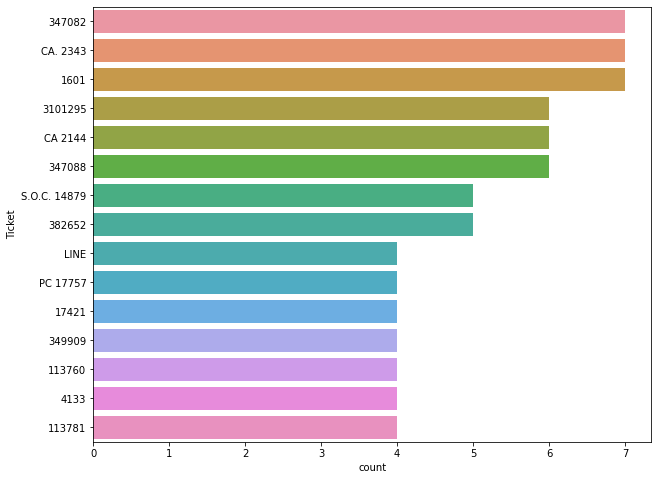

In [102]:
plt.figure(figsize=(10, 8))
sns.countplot(data=train_file, y="Ticket", order=train_file['Ticket'].value_counts().index[0:15])

In [103]:
b1_col = train_file.select_dtypes(include=('boolean'))
int_col = train_file.select_dtypes(include=('int')).columns
str_col = train_file.select_dtypes(include=('object')).columns

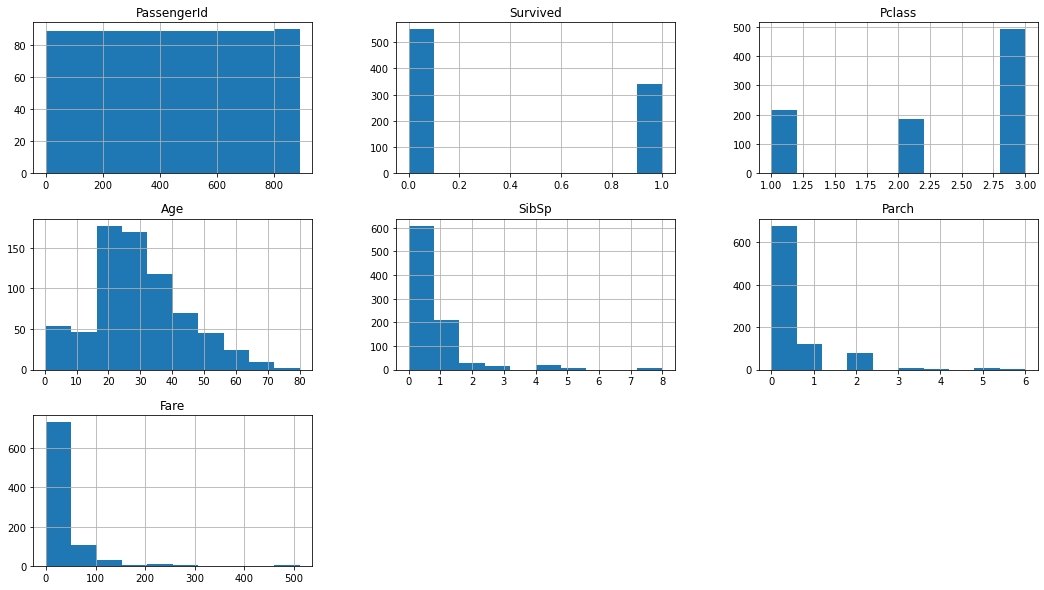

In [104]:
train_file.hist(figsize=(18, 10))
plt.show()

In [105]:
display(train_file.columns)
print("\n")
display(test_file.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

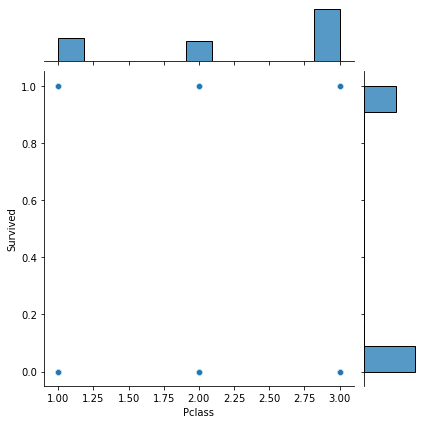

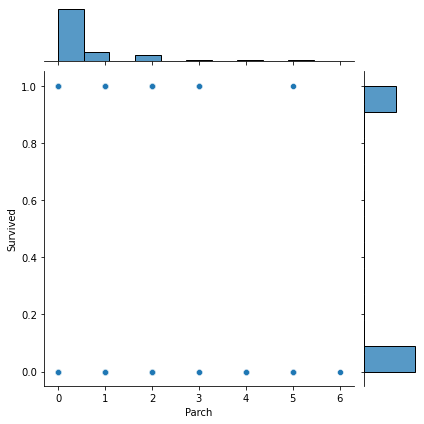

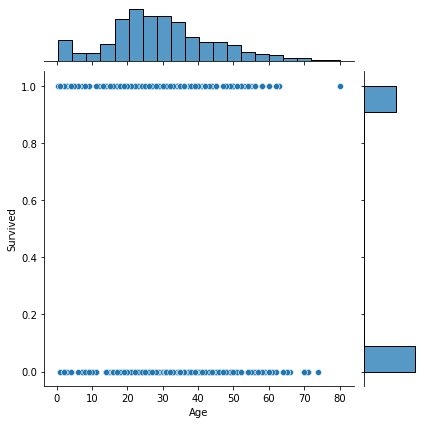

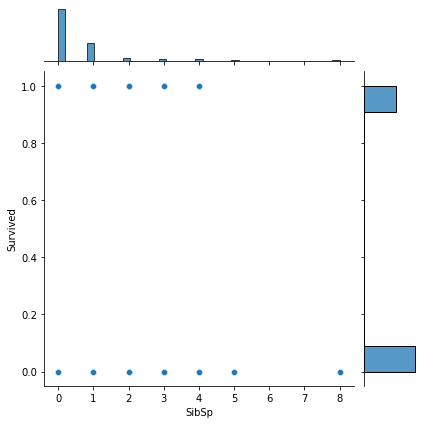

In [106]:
sns.jointplot(data=train_file, x='Pclass', y='Survived')
sns.jointplot(data=train_file, x='Parch', y='Survived')
sns.jointplot(data=train_file, x='Age', y='Survived')
sns.jointplot(data=train_file, x='SibSp', y='Survived')

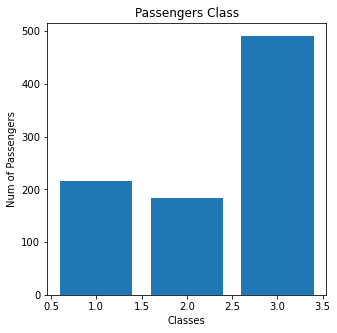

In [107]:
plt.figure(figsize=(5,5))
plt.bar(list(train_file['Pclass'].value_counts().keys()), list(train_file['Pclass'].value_counts()))
plt.title("Passengers Class")
plt.xlabel("Classes")
plt.ylabel("Num of Passengers")
plt.show()        

In [108]:
train_file['Pclass'].value_counts() # Passengers Class

3    491
1    216
2    184
Name: Pclass, dtype: int64

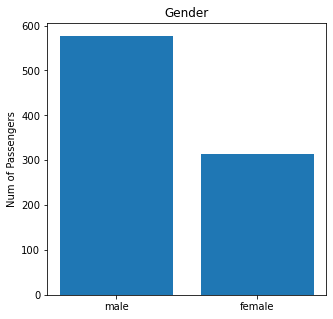

In [109]:
plt.figure(figsize=(5,5))
plt.bar(list(train_file['Sex'].value_counts().keys()), list(train_file['Sex'].value_counts()))
plt.title("Gender")
plt.ylabel("Num of Passengers")
plt.show()

In [110]:
train_file['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

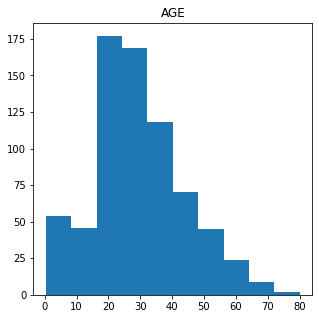

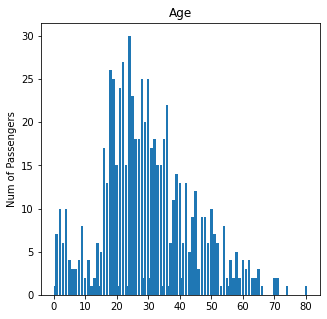

In [111]:
# Histogram
plt.figure(figsize=(5,5))
plt.hist(train_file['Age'])
plt.title("AGE")
plt.show()

#Bar
plt.figure(figsize=(5,5))
plt.bar(list(train_file['Age'].value_counts().keys()), list(train_file['Age'].value_counts()))
plt.title("Age")
plt.ylabel("Num of Passengers")
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

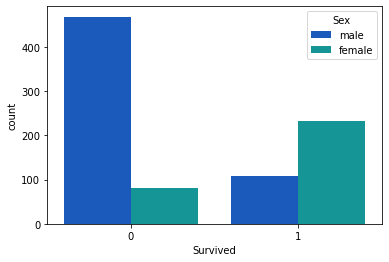

In [112]:
sns.countplot(x="Survived", hue='Sex', data=train_file, palette="winter")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

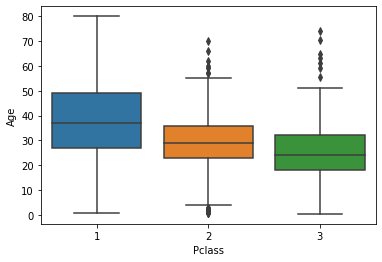

In [113]:
sns.boxplot(x="Pclass", y="Age", data=train_file)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

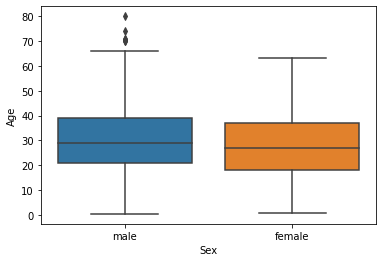

In [114]:
sns.boxplot(x="Sex", y="Age", data=train_file)

In [115]:
display(train_file.isnull().sum())
print("\n")
display(test_file.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
plt.figure(figsize=(18, 16))
sns.heatmap(train_file.isnull(), annot=True)
plt.show()

# Featuring

In [ ]:
train_file['Age'] = train_file['Age'].fillna(train_file['Age'].mean())


test_file['Age'] = test_file['Age'].fillna(test_file['Age'].mean())

In [ ]:
display(train_file['Age'].isnull().sum())
print("\n")
display(test_file['Age'].isnull().sum())

In [ ]:
train_file = train_file.drop('Cabin', axis=True)
test_file = test_file.drop('Cabin', axis=True)

In [ ]:
train_file

In [ ]:
test_file.isnull().sum()

In [ ]:
test_file['Fare'] = test_file['Fare'].fillna(test_file['Fare'].mean())

In [ ]:
test_file.isnull().sum()

In [ ]:
plt.figure(figsize=(18,16))
sns.heatmap(train_file.isnull(), annot=True)
plt.show()

In [ ]:
plt.scatter(train_file['Age'], train_file['Survived'], marker="*")

# LabelEncoding

In [ ]:
bl_col = train_file.select_dtypes(include=('boolean'))
int_col = train_file.select_dtypes(include=('int')).columns
str_col = train_file.select_dtypes(include=('object')).columns

str_col_1 = test_file.select_dtypes(include=('object')).columns

In [ ]:
display(str_col)
print("\n")
display(str_col_1)

In [ ]:
l_e = LabelEncoder()

In [ ]:
for col in str_col:
    train_file[col] = l_e.fit_transform(train_file[col].astype('str'))

In [ ]:
for col in str_col_1:
    test_file[col] = l_e.fit_transform(test_file[col].astype('str'))

# Feature and Target

In [ ]:
x = train_file.drop(['Survived'], axis=True)

In [ ]:
y = train_file[["Survived"]]

In [ ]:
x

In [ ]:
y

In [ ]:
x.corr()

In [ ]:
plt.figure(figsize=(18,16))
sns.heatmap(x.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
sns.pairplot(x)

In [ ]:
sns.pairplot(y)

In [ ]:
from sklearn.model_selection import train_test_split

# Training and Testing

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.33)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_depth=6,random_state=5)


rf.fit(x_train, y_train)

In [ ]:
predy = rf.predict(x_test)


In [ ]:
predy

In [ ]:
rf.score(x_test, y_test)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(predy, y_test)

In [ ]:
# passenger = train_file['PassengerId']

In [ ]:
rf.predict(test_file)

In [ ]:
x.shape

In [ ]:
predy.shape

In [ ]:
# import os

# os.remove('gender_submission.csv')
# output = pd.DataFrame({
# "PassengerId": x["PassengerId"][:179],
# "Survived": predy
# })

# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.ensemble import AdaBoostClassifier
# SVC.fit(x_train,y_train)
# r_f_c.fit(x_train,y_train)
# k_n_c.fit(x_train,y_train)
# x_g_b.fit(x_train,y_train)
# a_d_b.fit(x_train,y_train)
# y_s_v_c = s_v_c.predict(test_file)
# y_r_f_c = r_f_c.predict(test_file)
# y_k_n_c = k_n_c.predict(test_file)
# y_k_x_g = x_g_b.predict(test_file)
# y_a_d_b = a_d_b.predict(test_file)